# **Wykrywanie naczyń dna siatkówki**
##### Julia Mularczyk 148062
##### Jakub Mrówczyński 148068

## Wstęp
Celem sprawozdania jest przedstawienie projektu wykrywającego naczynia krwionośne dna siatkówki. W ramach projektu wykorzystano język programowania Python wraz z bibliotekami BIBLIOTEKI WSTAWIĆ.

## Język programowania oraz zastosowane biblioteki

Cały projekt został napisany w języku Python. 

In [ ]:
!pip install opencv-python
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install imbalanced-learn
!pip install joblib
!pip install scikit-image

In [8]:
import cv2
import numpy as np
import pandas as pd
import math

from matplotlib import pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from joblib import dump, load
from skimage import filters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [9]:
IMAGE_SIZE = 700

In [10]:
def load_img(path):
  img = cv2.imread(path)
  img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
  return img

In [25]:
def show_image(img, title="test"):
    image_size = 200
    img = cv2.resize(img, (image_size, image_size))
    #cv2.imshow("Image", img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    

In [13]:
def normalize_histogram(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    l_eq = cv2.equalizeHist(l)

    lab_eq = cv2.merge((l_eq, a, b))
    result = cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

    return result


def main_processing(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(image, (1, 1), 0)
    image = image.astype(np.uint8)
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 15)
    image = cv2.Laplacian(image, cv2.CV_64F)
    image = cv2.convertScaleAbs(image)
    return image


In [14]:
def processing_image(image):

  image = normalize_histogram(image)
  show_image(image)

  image = main_processing(image)
  return image

In [15]:
def confusion_matrix(TP, TN, FP, FN):
    names = {
        'My Results' : ['Positive', 'Negative', 'Sum'],
        'Actually - Positive' : [TP, FN, TP + FN],
        'Actually - Negative' : [FP, TN, FP + TN],
        'Sum' : [TP + FP, FN + TN, TP + FP + FN + TN]
    }
    
    df = pd.DataFrame(names, columns=['My Results', 'Actually - Positive', 'Actually - Negative', 'Sum' ]).set_index('My Results')
    return df

In [41]:
def show_statistics(predicted, model):
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0

    true_positive = np.sum((predicted > 0) & (model > 0))
    true_negative = np.sum((predicted == 0) & (model == 0))

    false_positive = np.sum((predicted > 0) & (model == 0))
    false_negative = np.sum((predicted == 0) & (model > 0))

    print(confusion_matrix(true_positive,true_negative,false_positive,false_negative))
    print()

    total = true_positive + true_negative + false_negative + false_positive
    
    accuracy = round((true_positive + true_negative) / (total), 4)
    sensitivity = round(true_positive / (true_positive + false_negative + 1), 4)
    specificity = round(true_negative / (false_positive + true_negative + 1), 4)
    precision = round(true_positive / (true_positive + false_positive + 1), 4)
    mean_sensitivity_specificity = round((sensitivity + specificity) / 2, 4)

    print("Accuracy: ", accuracy)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    print("Precision: ", precision)
    print("Mean Sensitivity-Specificity: ", mean_sensitivity_specificity)

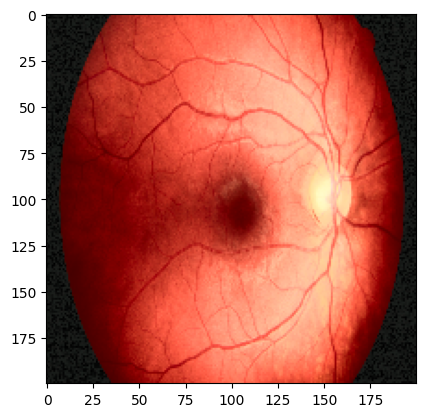

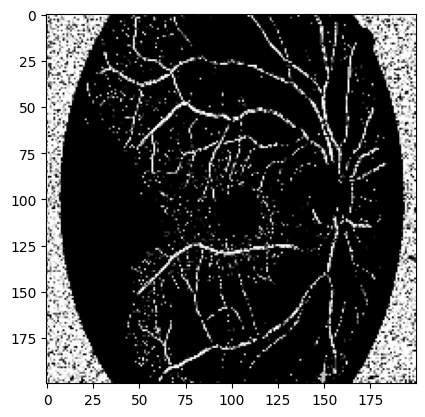


            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  19338                67967   87305
Negative                  37807               364888  402695
Sum                       57145               432855  490000

Accuracy:  0.7841
Sensitivity:  0.3384
Specificity:  0.843
Precision:  0.2215
Mean Sensitivity-Specificity:  0.5907


In [42]:
image = load_img('./healthy/03_h.jpg')
hand_made_image = load_img('./healthy_manualsegm/03_h.tif')
hand_made_image = cv2.cvtColor(hand_made_image, cv2.COLOR_BGR2GRAY)

image = processing_image(image)
show_image(image)
print()

show_statistics(image,hand_made_image)

# 5 przykładowych obrazów

In [43]:
def example_images(img):
  image = load_img('./healthy/' + img + '_h.jpg')

  hand_made_image = load_img('./healthy_manualsegm/' + img + '_h.tif')
  hand_made_image = cv2.cvtColor(hand_made_image, cv2.COLOR_BGR2GRAY)
  print(f"Processed image: {img}")
  print()

  image = processing_image(image)
  show_image(image)
  print()
  show_statistics(image,hand_made_image)

## Obraz 1

Processed image: 13



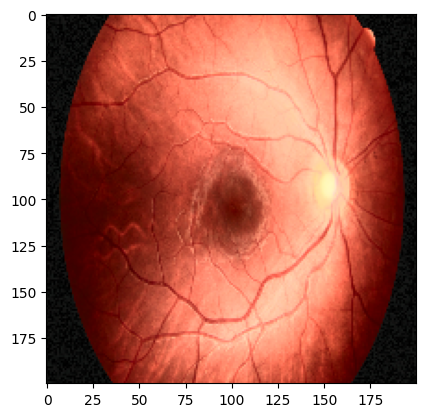

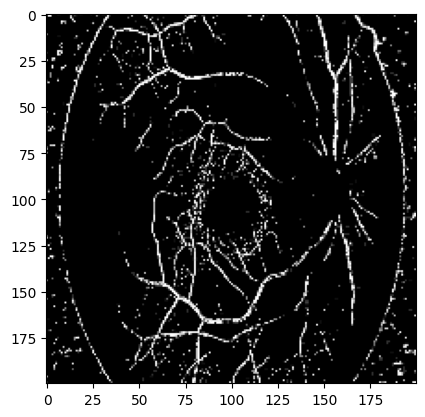


            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  18534                13676   32210
Negative                  28976               428814  457790
Sum                       47510               442490  490000

Accuracy:  0.913
Sensitivity:  0.3901
Specificity:  0.9691
Precision:  0.5754
Mean Sensitivity-Specificity:  0.6796


In [44]:
example_images('13')

## Obraz 2

Processed image: 07



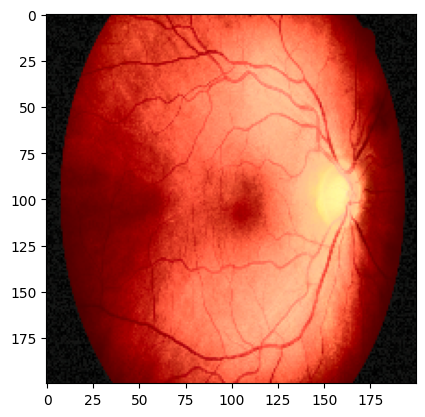

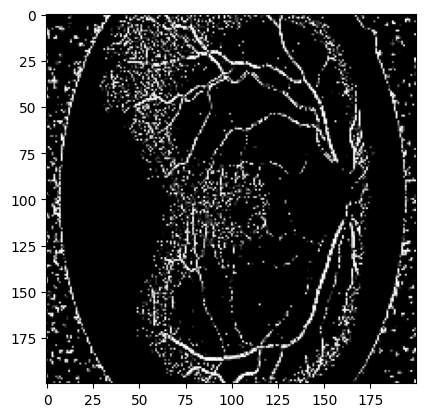


            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  18204                27896   46100
Negative                  30446               413454  443900
Sum                       48650               441350  490000

Accuracy:  0.8809
Sensitivity:  0.3742
Specificity:  0.9368
Precision:  0.3949
Mean Sensitivity-Specificity:  0.6555


In [45]:
example_images('07')

## Obraz 3

Processed image: 04



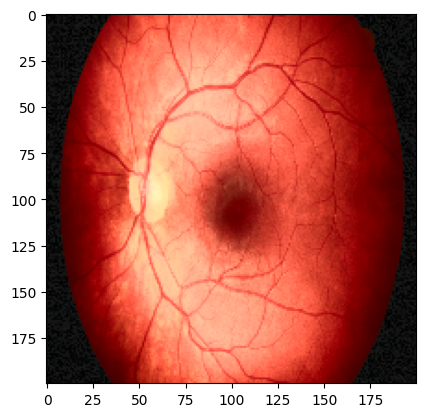

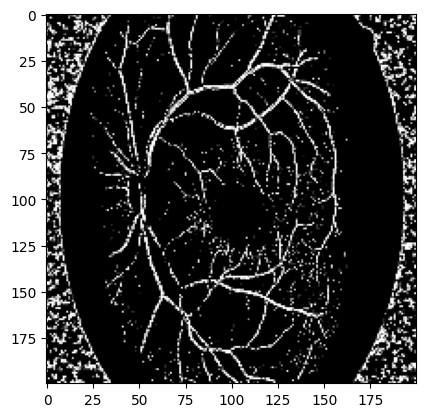


            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  23124                30886   54010
Negative                  28277               407713  435990
Sum                       51401               438599  490000

Accuracy:  0.8793
Sensitivity:  0.4499
Specificity:  0.9296
Precision:  0.4281
Mean Sensitivity-Specificity:  0.6898


In [46]:
example_images('04')

## Obraz 4


Processed image: 05



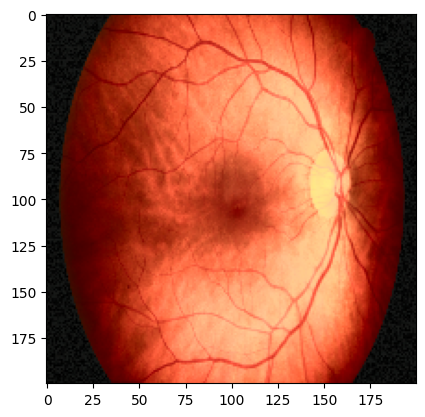

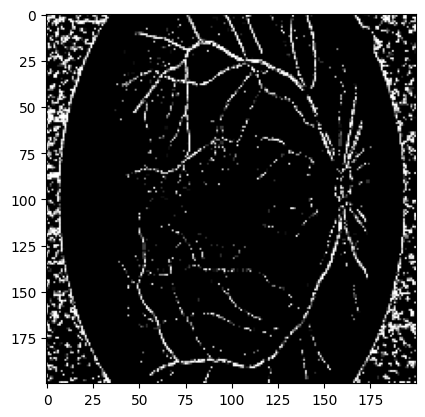


            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  15251                22267   37518
Negative                  34028               418454  452482
Sum                       49279               440721  490000

Accuracy:  0.8851
Sensitivity:  0.3095
Specificity:  0.9495
Precision:  0.4065
Mean Sensitivity-Specificity:  0.6295


In [47]:
example_images('05')

## Obraz 5

Processed image: 10



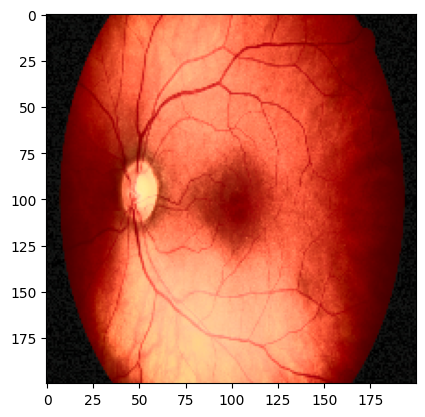

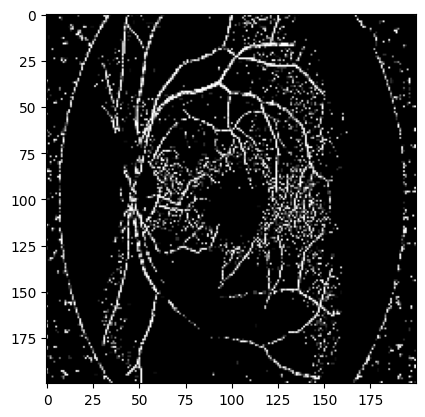


            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  19424                20376   39800
Negative                  28511               421689  450200
Sum                       47935               442065  490000

Accuracy:  0.9002
Sensitivity:  0.4052
Specificity:  0.9539
Precision:  0.488
Mean Sensitivity-Specificity:  0.6796


In [48]:
example_images('10')

## **Wykrywanie naczyń dna siatkówki oka używając podstawowego klasyfikatora**

### Ekstrakcja cech obrazu - get_features()
Oblicza momenty (moments) dla fragmentu obrazu w skali szarości za pomocą funkcji cv2.moments(). Moments są miarami statystycznymi, które opisują rozkład intensywności lub wartości pikseli w obrazie.
<br><br>
Korzystając z obliczonych momentów, funkcja oblicza Hu moments (cv2.HuMoments(moments).flatten()). Hu moments są zbiorem siedmiu momentów, które są niezmiennicze względem transformacji obrazu, takich jak rotacja, skalowanie i translacja. Te momenty przechowuje się w postaci spłaszczonego wektora za pomocą funkcji flatten().
<br><br>
Oblicza średnią (mean) dla każdego kanału (R, G, B) fragmentu obrazu kolorowego. Wykorzystuje funkcję np.mean() do obliczenia średniej dla każdej kolumny (axis=0) przekształconego do 2D kształtu fragmentu (patch.reshape(-1, 3)).
<br><br>
Oblicza odchylenie standardowe (std) dla każdego kanału (R, G, B) fragmentu obrazu kolorowego. Wykorzystuje funkcję np.std() do obliczenia odchylenia standardowego dla każdej kolumny (axis=0) przekształconego do 2D kształtu fragmentu (patch.reshape(-1, 3)).
<br><br>
Tworzy wektor cech (feature_vector) przez połączenie średnich, odchyleń standardowych i Hu moments za pomocą funkcji np.hstack(). W wyniku otrzymuje się jednowymiarowy wektor cech.


### Decyzja dla środkowego piksela wycinka - get_labels()

Funkcja przechodzi przez wszystkie możliwe fragmenty obrazu o określonym rozmiarze. Dla każdego fragmentu, pobiera etykietę ze środkowego piksela i dodaje ją do listy etykiet

### Wyznaczanie miar przy testowaniu - show_statistics()

Dokładność (accuracy) jest obliczana przez podzielenie sumy prawdziwie pozytywnych i prawdziwie negatywnych przypadków przez całkowitą liczbę przypadków.
<br><br>
Czułość (sensitivity) jest obliczana przez podzielenie liczby prawdziwie pozytywnych przypadków przez sumę prawdziwie pozytywnych, fałszywie negatywnych i dodanie 1, aby uniknąć dzielenia przez zero.
<br><br>
Swoistość (specificity) jest obliczana przez podzielenie liczby prawdziwie negatywnych przypadków przez sumę fałszywie pozytywnych i prawdziwie negatywnych oraz dodanie 1, aby uniknąć dzielenia przez zero.
<br><br>
Precyzja (precision) jest obliczana przez podzielenie liczby prawdziwie pozytywnych przypadków przez sumę prawdziwie pozytywnych i fałszywie pozytywnych oraz dodanie 1, aby uniknąć dzielenia przez zero.


In [51]:
PATCH_SIZE = 5

def get_features(image, gray):
    features = []
    height, width = gray.shape

    for y in range(0, height - PATCH_SIZE + 1):
        for x in range(0, width - PATCH_SIZE + 1):
            patch = image[y:y + PATCH_SIZE, x:x + PATCH_SIZE]
            patch_gray = gray[y:y + PATCH_SIZE, x:x + PATCH_SIZE]

            moments = cv2.moments(patch_gray)
            hu_moments = cv2.HuMoments(moments).flatten()

            mean = np.mean(patch.reshape(-1, 3), axis=0)
            std = np.std(patch.reshape(-1, 3), axis=0)
            
            feature_vector = np.hstack([mean, std,  hu_moments])
            features.append(feature_vector)

    return features


def get_labels(image):
    labels = []
    height, width = image.shape

    for y in range(0, height - PATCH_SIZE + 1):
        for x in range(0, width - PATCH_SIZE + 1):
            patch = image[y:y + PATCH_SIZE, x:x + PATCH_SIZE]
            label = patch[PATCH_SIZE // 2, PATCH_SIZE // 2]
            labels.append(label)

    return labels

def show_statistics(predicted, model):
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0

    true_positive = np.sum((predicted > 0) & (model > 0))
    true_negative = np.sum((predicted == 0) & (model == 0))

    false_positive = np.sum((predicted > 0) & (model == 0))
    false_negative = np.sum((predicted == 0) & (model > 0))

    total = true_positive + true_negative + false_negative + false_positive

    print(confusion_matrix(true_positive,true_negative,false_positive,false_negative))
    
    accuracy = round((true_positive + true_negative) / (total), 4)
    sensitivity = round(true_positive / (true_positive + false_negative + 1), 4)
    specificity = round(true_negative / (false_positive + true_negative + 1), 4)
    precision = round(true_positive / (true_positive + false_positive + 1), 4)
    mean_sensitivity_specificity = round((sensitivity + specificity) / 2, 4)

    print("Accuracy: ", accuracy)
    print("Sensitivity: ", sensitivity)
    print("Specificity: ", specificity)
    print("Precision: ", precision)
    print("Mean Sensitivity-Specificity: ", mean_sensitivity_specificity)


def get_predicted_image(image, predicted):
    height, width = image.shape
    new_image = np.zeros((height, width))
    for y in range(0, height - PATCH_SIZE + 1):
        for x in range(0, width - PATCH_SIZE + 1):
            new_image[y:y + PATCH_SIZE, x:x + PATCH_SIZE] = predicted[0]
            predicted = predicted[1:]
    return new_image


## Tworzenie klasyfikatora

Dla pięciu przykładowych obrazów następuje ekstrakcja cech, zamieszczając informacje w tablicach. Tablice te następnie podlegają undersampling-u, aby wybrać losową część danych, ograniczając rozmiar zbioru. Funkcja *train_test_split* podzieli dane na cztery zestawy:
1. X_train: Zbiór treningowy cech, który będzie wykorzystywany do trenowania modelu.
2. X_test: Zbiór testowy cech, który zostanie użyty do oceny wydajności modelu.
3. y_train: Zbiór treningowy etykiet, odpowiadający zbiorowi treningowemu cech.
4. y_test: Zbiór testowy etykiet, odpowiadający zbiorowi testowemu cech.

Na podstawie tych danych stworzony zostanie klasyfikator *RandomForestClassifier* i zapisany do pliku.

Argumenty konstruktora klasy RandomForestClassifier:

- n_estimators: Liczba drzew decyzyjnych w lesie losowym. W tym przypadku, n_estimators=1000 oznacza, że zostanie utworzony las losowy składający się z 1000 drzew decyzyjnych.
- n_jobs: Liczba jednocześnie używanych rdzeni procesora podczas budowy drzew decyzyjnych. W tym przypadku, n_jobs=-1 oznacza, że wszystkie dostępne rdzenie procesora będą wykorzystywane.

In [ ]:
def train_model():
    features = []
    labels = []

    train_data = ["01", "02", "03", "04", "05"]

    for train_image in train_data:
        print(f"Processing image: {train_image}")
        image = cv2.imread("./healthy/" + train_image + "_h.jpg")
        image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray = filters.unsharp_mask(gray)

        mask = cv2.imread("./healthy_fovmask/" + train_image + "_h_mask.tif")
        mask = cv2.resize(mask, (IMAGE_SIZE, IMAGE_SIZE))
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        mask = mask > 100
        gray[mask == 0] = 0

        model = cv2.imread("./healthy_manualsegm/" + train_image + "_h.tif")
        model = cv2.resize(model, (IMAGE_SIZE, IMAGE_SIZE))
        model = cv2.cvtColor(model, cv2.COLOR_BGR2GRAY)
        model = model > 10
        model[mask == 0] = 0
        print("Features and labels")
        features.extend(get_features(image, gray))
        labels.extend(get_labels(model))

    features = np.array(features)
    labels = np.array(labels)
    print("Creating and fitiing sampler")
    sampler = RandomUnderSampler(sampling_strategy=1)
    features, labels = sampler.fit_resample(features, labels)

    print("Train test split")
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    classifier = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    print("Classifier fitting")
    classifier.fit(X_train, y_train)

    print("Classifier scoring")
    accuracy = classifier.score(X_test, y_test)
    print("Accuracy:", accuracy)

    dump(classifier, "new_model.joblib")


train_model()

In [50]:
def load_classifier():
  return load("new_model.joblib")

loaded_classifier = load_classifier()

## Testowanie klasyfikatora na pięciu obrazach


Processed image: 07


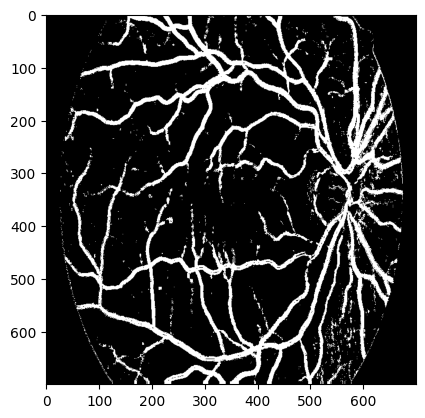

            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  33503                41903   75406
Negative                  14561               400033  414594
Sum                       48064               441936  490000
Accuracy:  0.8848
Sensitivity:  0.697
Specificity:  0.9052
Precision:  0.4443
Mean Sensitivity-Specificity:  0.8011

Processed image: 10


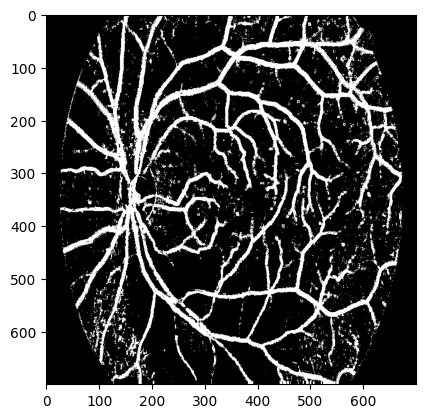

            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  33489                55340   88829
Negative                  13736               387435  401171
Sum                       47225               442775  490000
Accuracy:  0.859
Sensitivity:  0.7091
Specificity:  0.875
Precision:  0.377
Mean Sensitivity-Specificity:  0.792

Processed image: 12


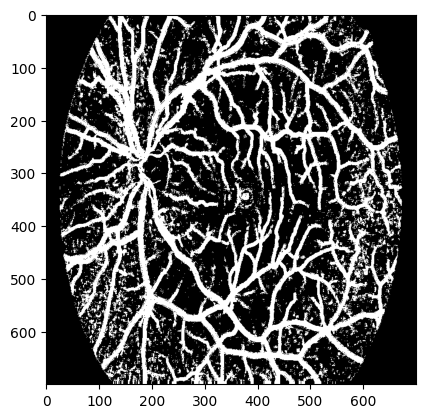

            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  50076                96783  146859
Negative                   5960               337181  343141
Sum                       56036               433964  490000
Accuracy:  0.7903
Sensitivity:  0.8936
Specificity:  0.777
Precision:  0.341
Mean Sensitivity-Specificity:  0.8353

Processed image: 13


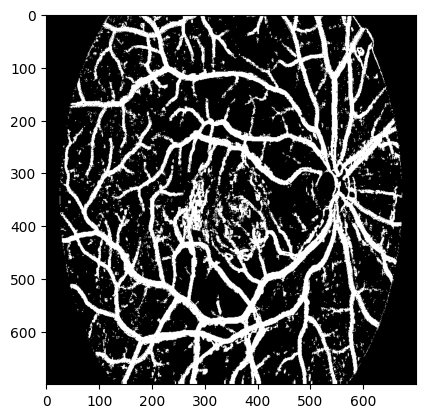

            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  39278                77837  117115
Negative                   7616               365269  372885
Sum                       46894               443106  490000
Accuracy:  0.8256
Sensitivity:  0.8376
Specificity:  0.8243
Precision:  0.3354
Mean Sensitivity-Specificity:  0.831

Processed image: 14


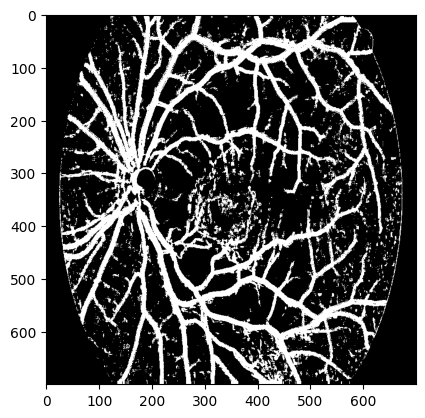

            Actually - Positive  Actually - Negative     Sum
My Results                                                  
Positive                  38614                78490  117104
Negative                   8508               364388  372896
Sum                       47122               442878  490000
Accuracy:  0.8225
Sensitivity:  0.8194
Specificity:  0.8228
Precision:  0.3297
Mean Sensitivity-Specificity:  0.8211


In [52]:
test_data = ["07", "10", "12", "13", "14"]


for train_image in test_data:
  image = cv2.imread("./healthy/" + train_image + "_h.jpg")
  image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
  plt.imshow(image)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = filters.unsharp_mask(gray)

  mask = cv2.imread("./healthy_fovmask/" + train_image + "_h_mask.tif")
  mask = cv2.resize(mask, (IMAGE_SIZE, IMAGE_SIZE))
  mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
  mask = mask > 100
  gray[mask == 0] = 0

  model = cv2.imread("./healthy_manualsegm/" + train_image + "_h.tif")
  model = cv2.resize(model, (IMAGE_SIZE, IMAGE_SIZE))
  model = cv2.cvtColor(model, cv2.COLOR_BGR2GRAY)
  model = model > 10
  model[mask == 0] = 0

  classifier = loaded_classifier
  predictions = classifier.predict(get_features(image, gray))

  print()
  print(f"Processed image: {train_image}")
  predicted_image = get_predicted_image(gray, predictions)
  plt.imshow(predicted_image, cmap='gray')
  plt.show()


  show_statistics(predicted_image, model)